In [19]:
import pandas as pd
import numpy as np

# Assume df is your DataFrame
df = pd.read_csv('GWS.csv')  # replace this line with how you load your data

# Calculate autocorrelation for each lat, lon pair
lag = 1  # change this if you want a different lag
autocorrs = []

for i, row in df.iterrows():
    ts = row[2:]  # get the time series data
    autocorr = ts.autocorr(lag=lag)  # calculate autocorrelation
    autocorrs.append(autocorr)

# Create the results DataFrame
results_df = df[['lat', 'lon']].copy()
results_df['autocorr'] = autocorrs

# Handle any infinite or NaN autocorrelation values
results_df.replace([np.inf, -np.inf], np.nan, inplace=True)
results_df.dropna(subset=['autocorr'], inplace=True)

results_df.to_csv('autocorrelation_results.csv', index=False)  # save the results to a CSV file

In [20]:
results_df

,lat,lon,autocorr
0,27.875,31.375,0.867560
1,27.875,31.625,0.812507
2,27.875,31.875,0.694750
3,27.875,32.125,0.909733
4,27.875,32.375,0.908600
...,...,...,...
6197,51.125,18.875,0.859938
6198,51.125,19.125,0.858750
6199,51.125,19.375,0.860123
6200,51.125,19.625,0.861504


In [21]:
A, B = results_df['autocorr'].min(), results_df['autocorr'].max()
A, B

(0.3883827587119643, 0.9752273687728971)

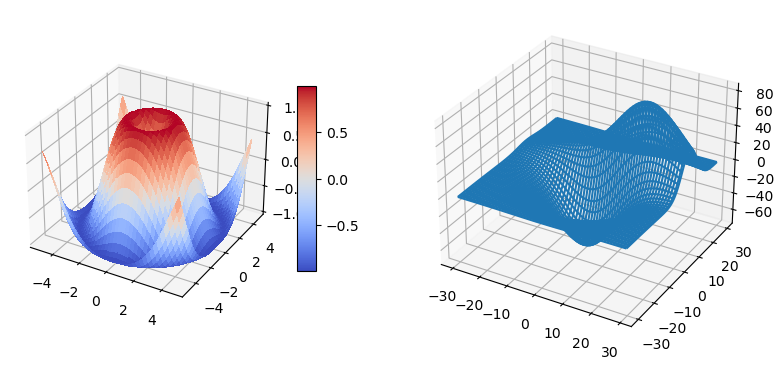

In [36]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

plt.show()